<h1 style="font-size:50px;color:blue;text-align:center;">Całkowanie Numeryczne metodą Romberga</h1>

In [1]:
import math as m
import numpy as np
import matplotlib.pyplot as plt

liczby = []

In [2]:
def function(x):
    return np.sin(x)/x

<p>W metodzie function umieszczan jest funkcja, która będzie całkowana numerycznie metodą romberga</p>

In [3]:
def trapezoidal(f,gg,dg,n):
    deltax = (gg-dg)/n
    h = deltax + dg

    calka = 0
    for i in range (1,n,1):
        calka += 2*f(h)
        h = h + deltax
    calka += f(gg)
    calka += f(dg)
    calka *= deltax/2
    return calka

<p>Pierwszym krokiem rozwiązania całki metodą romberga, jest oblicznie całki metodą trapezów
argumenty przekazywane do funkcji trapezoidal:</p>
    <ul>
                <li>f - funkcja, która będzie całkowana - funkcja, która będzie całkowana</li>
                <li>gg - górna granica całkowania</li>
                <li> dg - dolna granica całkowania</li>
                <li> n - liczba trapezów na który dzielimy obszar pod funkcją</li>
            </ul>

In [4]:
def pierwszyRzad(f,gg,dg,rzad):
    n = 1
    krok = 1
    liczby.append(round(trapezoidal(f,gg,dg,n),6))
    n+=1
    while(krok <= rzad):
        liczby.append(round(trapezoidal(f,gg,dg,n),6))
        n =n*2
        krok+=1
    liczby.pop()
    return liczby

<p>Metoda pierwszyRzad korzysta z metody trapezoidal, aby móć wynzaczyć pierwszy Rząd metody romberga metodą trapezów. Następnie obliczone wartości są umieszczane w liście  </p>
          <ul>
                <li>rzad - określa rząd do którego ma być liczona całka metodą romberga</li>              
            </ul>

In [ ]:
def romberg(f,gg,dg,rzad):
    liczby = pierwszyRzad(f,gg,dg,rzad)
    print("Rząd romberga: ", 1, liczby)
    wpotega = 2
    for step in range(1, rzad):
        for i in range(len(liczby) - 1):
            dzielnik = 2 ** wpotega - 1
            liczby[i] = round(liczby[i+1] + (liczby[i+1] - liczby[i])/dzielnik, 6)
        wpotega += 2
        liczby.pop()
        print("Rząd romberga: ", step+1, liczby)

<p> Metoda romberg wyznacza kolejne rzędy naszej całki, wykorzystuje do tego kolejne udoskonalenia i dzięki tym udoskonaleniom pozwala uzyskać lespsze przybliżenia </p>

<h2 style="font-size:30px;color:green;text-align:center;">Całkowanie funkcji sin(x)/x</h2>

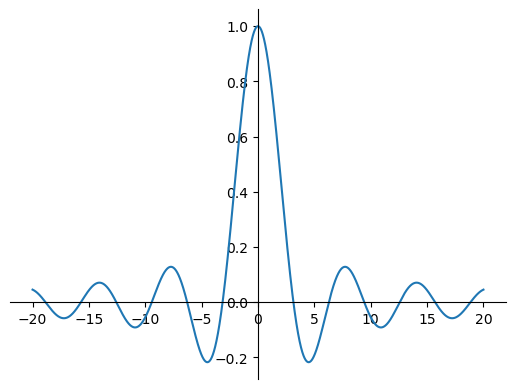

In [6]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
x = np.linspace(-20,20,10000)
y = np.sin(x)/x
plt.plot(x,y)
plt.show()

<p> Wykreślenie wykresu funkcji </p>

In [7]:
romberg(function,14,-12,8)

Rząd romberga:  1 [0.338562, 11.108404, 5.533315, 3.144922, 3.07926, 3.06556, 3.062268, 3.061453]
Rząd romberga:  2 [14.698351, 3.674952, 2.348791, 3.057373, 3.060993, 3.061171, 3.061181]
Rząd romberga:  3 [2.940059, 2.26038, 3.104612, 3.061234, 3.061183, 3.061182]
Rząd romberga:  4 [2.249591, 3.118013, 3.060545, 3.061182, 3.061182]
Rząd romberga:  5 [3.121419, 3.06032, 3.061184, 3.061182]
Rząd romberga:  6 [3.06026, 3.061185, 3.061182]
Rząd romberga:  7 [3.061185, 3.061182]
Rząd romberga:  8 [3.061182]


<p> Wynik metody całkowania metodą romberga </p>

In [8]:
wolfram = 3.06118 #np.sin(x)/x przedziały 14 -12
bezwzględny = wolfram-liczby[0]
wzgledny = bezwzględny/wolfram
print("Błąd bezwzględny",bezwzględny)
print("Błąd względny",wzgledny)

Błąd bezwzględny -2.000000000279556e-06
Błąd względny -6.53342828673765e-07


<p>Obliczenie błędu względnego i bezwzględnego dla funkcji sin(x)/x</p>

<h2 style="font-size:30px;color:purple;text-align:center;">Całkowanie funkcji sin(exp(-x))</h2>

In [9]:
liczby.clear()
def function(x):
    return np.sin(np.exp(-x))

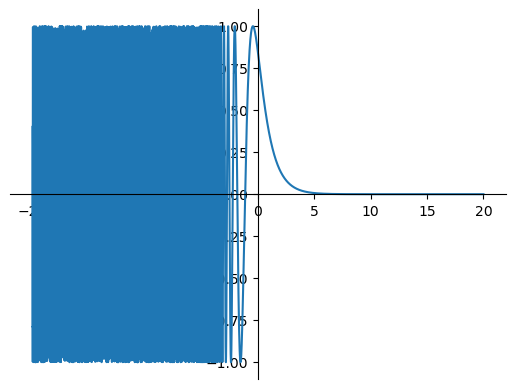

In [10]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
y = np.sin(np.exp(-x))
plt.plot(x,y)
plt.show()

In [11]:
romberg(function,14,-12,12)

Rząd romberga:  1 [12.893013, 11.121795, 3.321651, 3.768788, -0.767945, -0.094546, 0.490847, 1.33188, 0.843957, 1.457271, 1.582578, 1.525075]
Rząd romberga:  2 [10.531389, 0.721603, 3.917834, -2.280189, 0.12992, 0.685978, 1.612224, 0.681316, 1.661709, 1.624347, 1.505907]
Rząd romberga:  3 [0.067617, 4.130916, -2.693391, 0.290594, 0.723049, 1.673974, 0.619255, 1.727069, 1.621856, 1.498011]
Rząd romberga:  4 [4.195413, -2.801713, 0.337959, 0.729913, 1.689068, 0.602513, 1.744653, 1.620186, 1.496045]
Rząd romberga:  5 [-2.829153, 0.350271, 0.73145, 1.692829, 0.598252, 1.749132, 1.619698, 1.495558]
Rząd romberga:  6 [0.353379, 0.731823, 1.693769, 0.597182, 1.750257, 1.619571, 1.495437]
Rząd romberga:  7 [0.731915, 1.694004, 0.596914, 1.750539, 1.619539, 1.495407]
Rząd romberga:  8 [1.694063, 0.596847, 1.750609, 1.619531, 1.495399]
Rząd romberga:  9 [0.59683, 1.750627, 1.619529, 1.495397]
Rząd romberga:  10 [1.750631, 1.619528, 1.495397]
Rząd romberga:  11 [1.619528, 1.495397]
Rząd romberga:

In [12]:
wolfram = 1.57079 #np.sin(x)/x przedziały 14 -12
bezwzględny = wolfram-liczby[0]
wzgledny = bezwzględny/wolfram
print("Błąd bezwzględny",bezwzględny)
print("Błąd względny",wzgledny)

Błąd bezwzględny 0.07539299999999982
Błąd względny 0.04799686781810415
